scikit-learn 套件的首頁可以一目瞭然它的應用領域：


監督式學習（Supervised learning）
 *分類（Classification）
 *迴歸（Regression）

非監督式學習（Unsupervised learning）
 *分群（Clustering）

降維（Dimensionality reduction）
模型選擇（Model selection）
預處理（Preprocessing）

玩具資料（Toy datasets）

我們在練習資料視覺化或者機器學習的時候，除了可以自己產生資料以外，也可以用所謂的玩具資料（Toy datasets），玩具資料並不是一個特定的資料，而是泛指一些小而美的標準資料，像是在 R 語言中我們很習慣使用的 iris、cars 與 mtcars 資料框都是玩具資料。

In [6]:
#我們使用 sklearn 的 datasets 物件的 load_iris() 方法來讀入鳶尾花資料。
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
print(type(iris.data)) # 資料是儲存為 ndarray
print(iris.feature_names) # 變數名稱可以利用 feature_names 屬性取得
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names) # 轉換為 data frame
iris_df.ix[:,"species"] = iris.target # 將品種加入 data frame
iris_df.head() # 觀察前五個觀測值


#還有其他更多的玩具資料，像是波士頓房地產資料可以透過 load_boston() 方法讀入，
#糖尿病病患資料可以透過 load_diabetes() 方法讀入，
#詳情參考 Dataset loading utilities - scikit-learn 0.18.1 documentation。

<class 'numpy.ndarray'>
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


C:\Users\Java\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


建立線性迴歸分析模型

我很喜歡世界第一簡單統計學迴歸分析篇的一個簡單例子：用氣溫來預測冰紅茶的銷售量。

In [12]:
#我們使用 sklearn.linear_model 的 LinearRegression() 方法。

import numpy as np
from sklearn.linear_model import LinearRegression

temperatures = np.array([29, 28, 34, 31, 25, 29, 32, 31, 24, 33, 25, 31, 26, 30])
iced_tea_sales = np.array([77, 62, 93, 84, 59, 64, 80, 75, 58, 91, 51, 73, 65, 84])

lm = LinearRegression()
lm.fit(np.reshape(temperatures, (len(temperatures), 1)), 
       np.reshape(iced_tea_sales, (len(iced_tea_sales), 1)))

# 印出係數
print(lm.coef_)

# 印出截距
print(lm.intercept_ )

[[ 3.73788546]]
[-36.36123348]


利用線性迴歸分析模型預測

建立線性迴歸模型之後，身為冰紅茶店的老闆，就可以開始量測氣溫，藉此來預測冰紅茶銷量，更精準地掌握原料的管理。

Python

我們使用 LinearRegression() 的 predict() 方法。

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression

temperatures = np.array([29, 28, 34, 31, 25, 29, 32, 31, 24, 33, 25, 31, 26, 30])
iced_tea_sales = np.array([77, 62, 93, 84, 59, 64, 80, 75, 58, 91, 51, 73, 65, 84])

lm = LinearRegression()
lm.fit(np.reshape(temperatures, (len(temperatures), 1)), 
       np.reshape(iced_tea_sales, (len(iced_tea_sales), 1)))

# 新的氣溫
to_be_predicted = np.array([30])
predicted_sales = lm.predict(np.reshape(to_be_predicted, 
                                        (len(to_be_predicted), 1)))

# 預測的冰紅茶銷量
print(predicted_sales)

[[ 75.7753304]]


線性迴歸視覺化

我們可以使用 [第 18 天] 資料視覺化 matplotlib 提過的 Python matplotlib 套件與 R 語言的 Base plotting system。

Python

我們使用 matplotlib.pyplot 的 scatter() 與 plot() 方法。

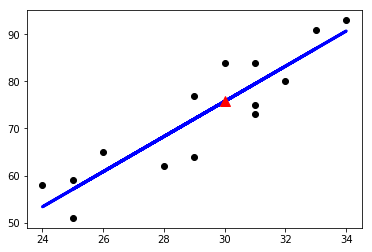

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

temperatures = np.array([29, 28, 34, 31, 25, 29, 32, 31, 24, 33, 25, 31, 26, 30])
iced_tea_sales = np.array([77, 62, 93, 84, 59, 64, 80, 75, 58, 91, 51, 73, 65, 84])

lm = LinearRegression()
lm.fit(np.reshape(temperatures, (len(temperatures), 1)), np.reshape(iced_tea_sales, (len(iced_tea_sales), 1)))

# 新的氣溫
to_be_predicted = np.array([30])
predicted_sales = lm.predict(np.reshape(to_be_predicted, (len(to_be_predicted), 1)))

# 視覺化
plt.scatter(temperatures, iced_tea_sales, color='black')
plt.plot(temperatures, lm.predict(np.reshape(temperatures, (len(temperatures), 1))), color='blue', linewidth=3)
plt.plot(to_be_predicted, predicted_sales, color = 'red', marker = '^', markersize = 10)
# plt.xticks(())
# plt.yticks(())
plt.show()

線性迴歸模型的績效

線性迴歸模型的績效（Performance）有 **Mean squared error（MSE）**與 R-squared。

Python

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression

temperatures = np.array([29, 28, 34, 31, 25, 29, 32, 31, 24, 33, 25, 31, 26, 30])
iced_tea_sales = np.array([77, 62, 93, 84, 59, 64, 80, 75, 58, 91, 51, 73, 65, 84])

# 轉換維度
temperatures = np.reshape(temperatures, (len(temperatures), 1))
iced_tea_sales = np.reshape(iced_tea_sales, (len(iced_tea_sales), 1))

lm = LinearRegression()
lm.fit(temperatures, iced_tea_sales)

# 模型績效
mse = np.mean((lm.predict(temperatures) - iced_tea_sales) ** 2)
r_squared = lm.score(temperatures, iced_tea_sales)

# 印出模型績效
print(mse)
print(r_squared)

27.9348646948
0.822509288117
